In [1]:
data_path = '../../data/'

In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
from jupyterthemes import jtplot

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

In [4]:
ans = pd.read_csv(data_path + 'answers.csv')
que = pd.read_csv(data_path + 'questions.csv')

In [5]:
stopwords = stopwords.words('english')

In [6]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
ps = PorterStemmer()
stemmed = dict()

In [7]:
def process_text(text: str):
    ret = []
    for word in word_tokenize(str(text).lower()):
        if word.isalpha() and word not in stopwords:
            if word not in stemmed:
                stemmed[word] = ps.stem(word)
            ret.append(stemmed[word])
    return ret

In [43]:
ans['answers_body'] = ans['answers_body'].apply(process_text)

In [10]:
que['questions_title'] = que['questions_title'].apply(process_text)
que['questions_body'] = que['questions_body'].apply(process_text)

In [16]:
ans_que = ans.merge(que, left_on = "answers_question_id", right_on = "questions_id")

In [17]:
ans_que

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr..."
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,"[want, becom, armi, offic, becom, armi, offic]","[priyanka, bangalor, std, go, colleg, get, con..."
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,"[want, becom, armi, offic, becom, armi, offic]","[priyanka, bangalor, std, go, colleg, get, con..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,"[go, abroad, first, job, increas, chanc, job, ...","[plan, go, abroad, first, job, teach, job, ser..."
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,"[becom, specialist, busi, manag, network]","[hear, busi, manag, hard, way, get, job, known..."
5,5f62fadae80748c7907e3b0551bf4203,b03c3872daeb4a5cb1d8cd510942f0c4,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-12 16:01:44 UTC+0000,Networking is a key component to progressing y...,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,"[becom, specialist, busi, manag, network]","[hear, busi, manag, hard, way, get, job, known..."
6,1d804b3b9e764cdd90195fb138d1a5aa,f6c89fde797d45938bce3531f55c9b6b,5af8880460c141dbb02971a1a8369529,2017-09-29 18:50:11 UTC+0000,https://www.unigo.com/\n\nCheck out this websi...,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,"[scholarship, student, first, gener, live, ga]","[tri, find, scholarship, first, year, student,..."
7,08d3cf6fa20543ddbdc42f70a7bcae9e,5bc2db4d58584f95bdba30ed2c21d573,5af8880460c141dbb02971a1a8369529,2018-06-08 02:39:02 UTC+0000,"<p>Hi Jocelyn ,</p><p><br></p><p>May I recomme...",5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,"[scholarship, student, first, gener, live, ga]","[tri, find, scholarship, first, year, student,..."
8,9d33d099a03c44328fbf166aad585f63,8136c8653d3a4895b49cac90b88120d2,7c336403258f4da3a2e0955742c76462,2017-03-01 16:52:43 UTC+0000,<p>For the typical schedule it takes four year...,7c336403258f4da3a2e0955742c76462,d1e4587c0e784c62bc27eb8d16a07f38,2017-03-01 04:27:08 UTC+0000,"[mani, year, coeg, need, engin]",[engin]
9,228e5feefb4e42188b7c48a5c7eb3aa8,35c8d979b56647839c8df0f0383648cd,be3c5edfdb07423e955e9b2d7f186bce,2017-10-13 18:08:20 UTC+0000,Of course! I know someone who doubled in class...,be3c5edfdb07423e955e9b2d7f186bce,71b4554d4a824253aa28287372c55797,2017-09-01 04:59:38 UTC+0000,"[want, becom, doctor, great, interest, scienc,...","[musician, want, pursu, colleg, well, want, lo..."


In [13]:
prof = pd.read_csv(data_path + 'professionals.csv')

In [14]:
prof['professionals_industry'] = prof['professionals_industry'].apply(process_text)
prof['professionals_industry'] = prof['professionals_industry'].apply(lambda x: ' '.join((x + ['', ''])[:3]))

In [18]:
merged = ans_que.merge(prof, left_on = 'answers_author_id', right_on = 'professionals_id')

In [111]:
considerable = set(merged.professionals_industry.value_counts().where(lambda x: x>0).dropna().index)

In [112]:
len(considerable)

942

In [113]:
filtered = merged[merged.professionals_industry.isin(considerable)]

In [114]:
filtered

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,"[teacher, career, question]","[math, teacher, math, teacher, use, colleg, pr...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,"[kind, colleg, could, go, soccer, player]","[like, soccer, play, sens, year, old, soccer, ...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,825f6e316a5f48328d6f8af831df9940,36ff3b3666df400f956f8335cf53e09e,0149c6d63e214040b44d4a3789bb00ba,2018-04-15 23:08:46 UTC+0000,<p>Congratulations on being interested in find...,0149c6d63e214040b44d4a3789bb00ba,34217a1861d640a58c85e033414cf9cb,2018-04-12 17:13:45 UTC+0000,"[best, way, prepar, studi, engin, graduat, sch...","[interest, comput, neurosci, hope, studi, eith...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3fc23809cda472780fc565334f35000,36ff3b3666df400f956f8335cf53e09e,acc611cfb5c44daa8a3d7d65dfffa5ff,2018-08-14 10:37:01 UTC+0000,<p>The most important thing that you can do is...,acc611cfb5c44daa8a3d7d65dfffa5ff,5b751a8ee4a047f7a08ce9eb5e43e5a2,2018-08-14 04:49:33 UTC+0000,"[prepar, job, search, go, senior, year, colleg]","[sociolog, polit, scienc, intern, studi, major...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,7410001e9a2f46df982cba38ba60486a,36ff3b3666df400f956f8335cf53e09e,b44409c0c83a43578f4f2d0a0e4d8ead,2016-12-08 02:26:05 UTC+0000,<p>Hi Alexandra!</p>\n<p>Here is the site for ...,b44409c0c83a43578f4f2d0a0e4d8ead,2fe767de78fa4dfd83f0021cf7712064,2016-12-07 20:43:41 UTC+0000,"[major, recommend, order, ethnomusicologist]","[current, enrol, world, music, class, univers,...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,8961104db49b42e6882661724543b565,36ff3b3666df400f956f8335cf53e09e,27653986401c4a8388d03cfa28acf5b4,2016-10-20 21:47:01 UTC+0000,<p>Hi Christopher!</p>\n<p>You asked a very go...,27653986401c4a8388d03cfa28acf5b4,b5bd31ccef2d4a4fa638dd931a0e6cc9,2016-10-20 19:28:36 UTC+0000,"[much, opportun, stem, major, entertain, indus...","[question, regard, potenti, find, employ, indu...",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
6,d29c121eb71b43a3a338008353559bdd,36ff3b3666df400f956f8335cf53e09e,7017565a7f0141dbb47a3445ed128e34,2018-10-05 13:58:37 UTC+0000,<p>If you use the process which I present belo...,7017565a7f0141dbb47a3445ed128e34,a180b2b6ef444a0dbc6adf740fe8c12c,2018-10-05 13:28:50 UTC+0000,"[find, job, career, field, colleg]","[colleg, job]",36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",mental health care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
7,ba25ed162f2e46deb1f022372c84c9c7,36ff3b3666df400f956f8335cf53e09e,3c64129b6a3f4728adabeecf23afdea2,2018-08-31 13:27:50

In [115]:
prepared = [TaggedDocument(row.questions_title + row.questions_body, [row.professionals_industry]) for i, row in filtered.iterrows()]

In [116]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [117]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 942 samples in 0.000s...
[t-SNE] Computed neighbors for 942 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 942 / 942
[t-SNE] Mean sigma: 0.516321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.647957
[t-SNE] KL divergence after 1000 iterations: 1.205944


In [118]:
d2v.docvecs.vectors_docs.shape

(942, 10)

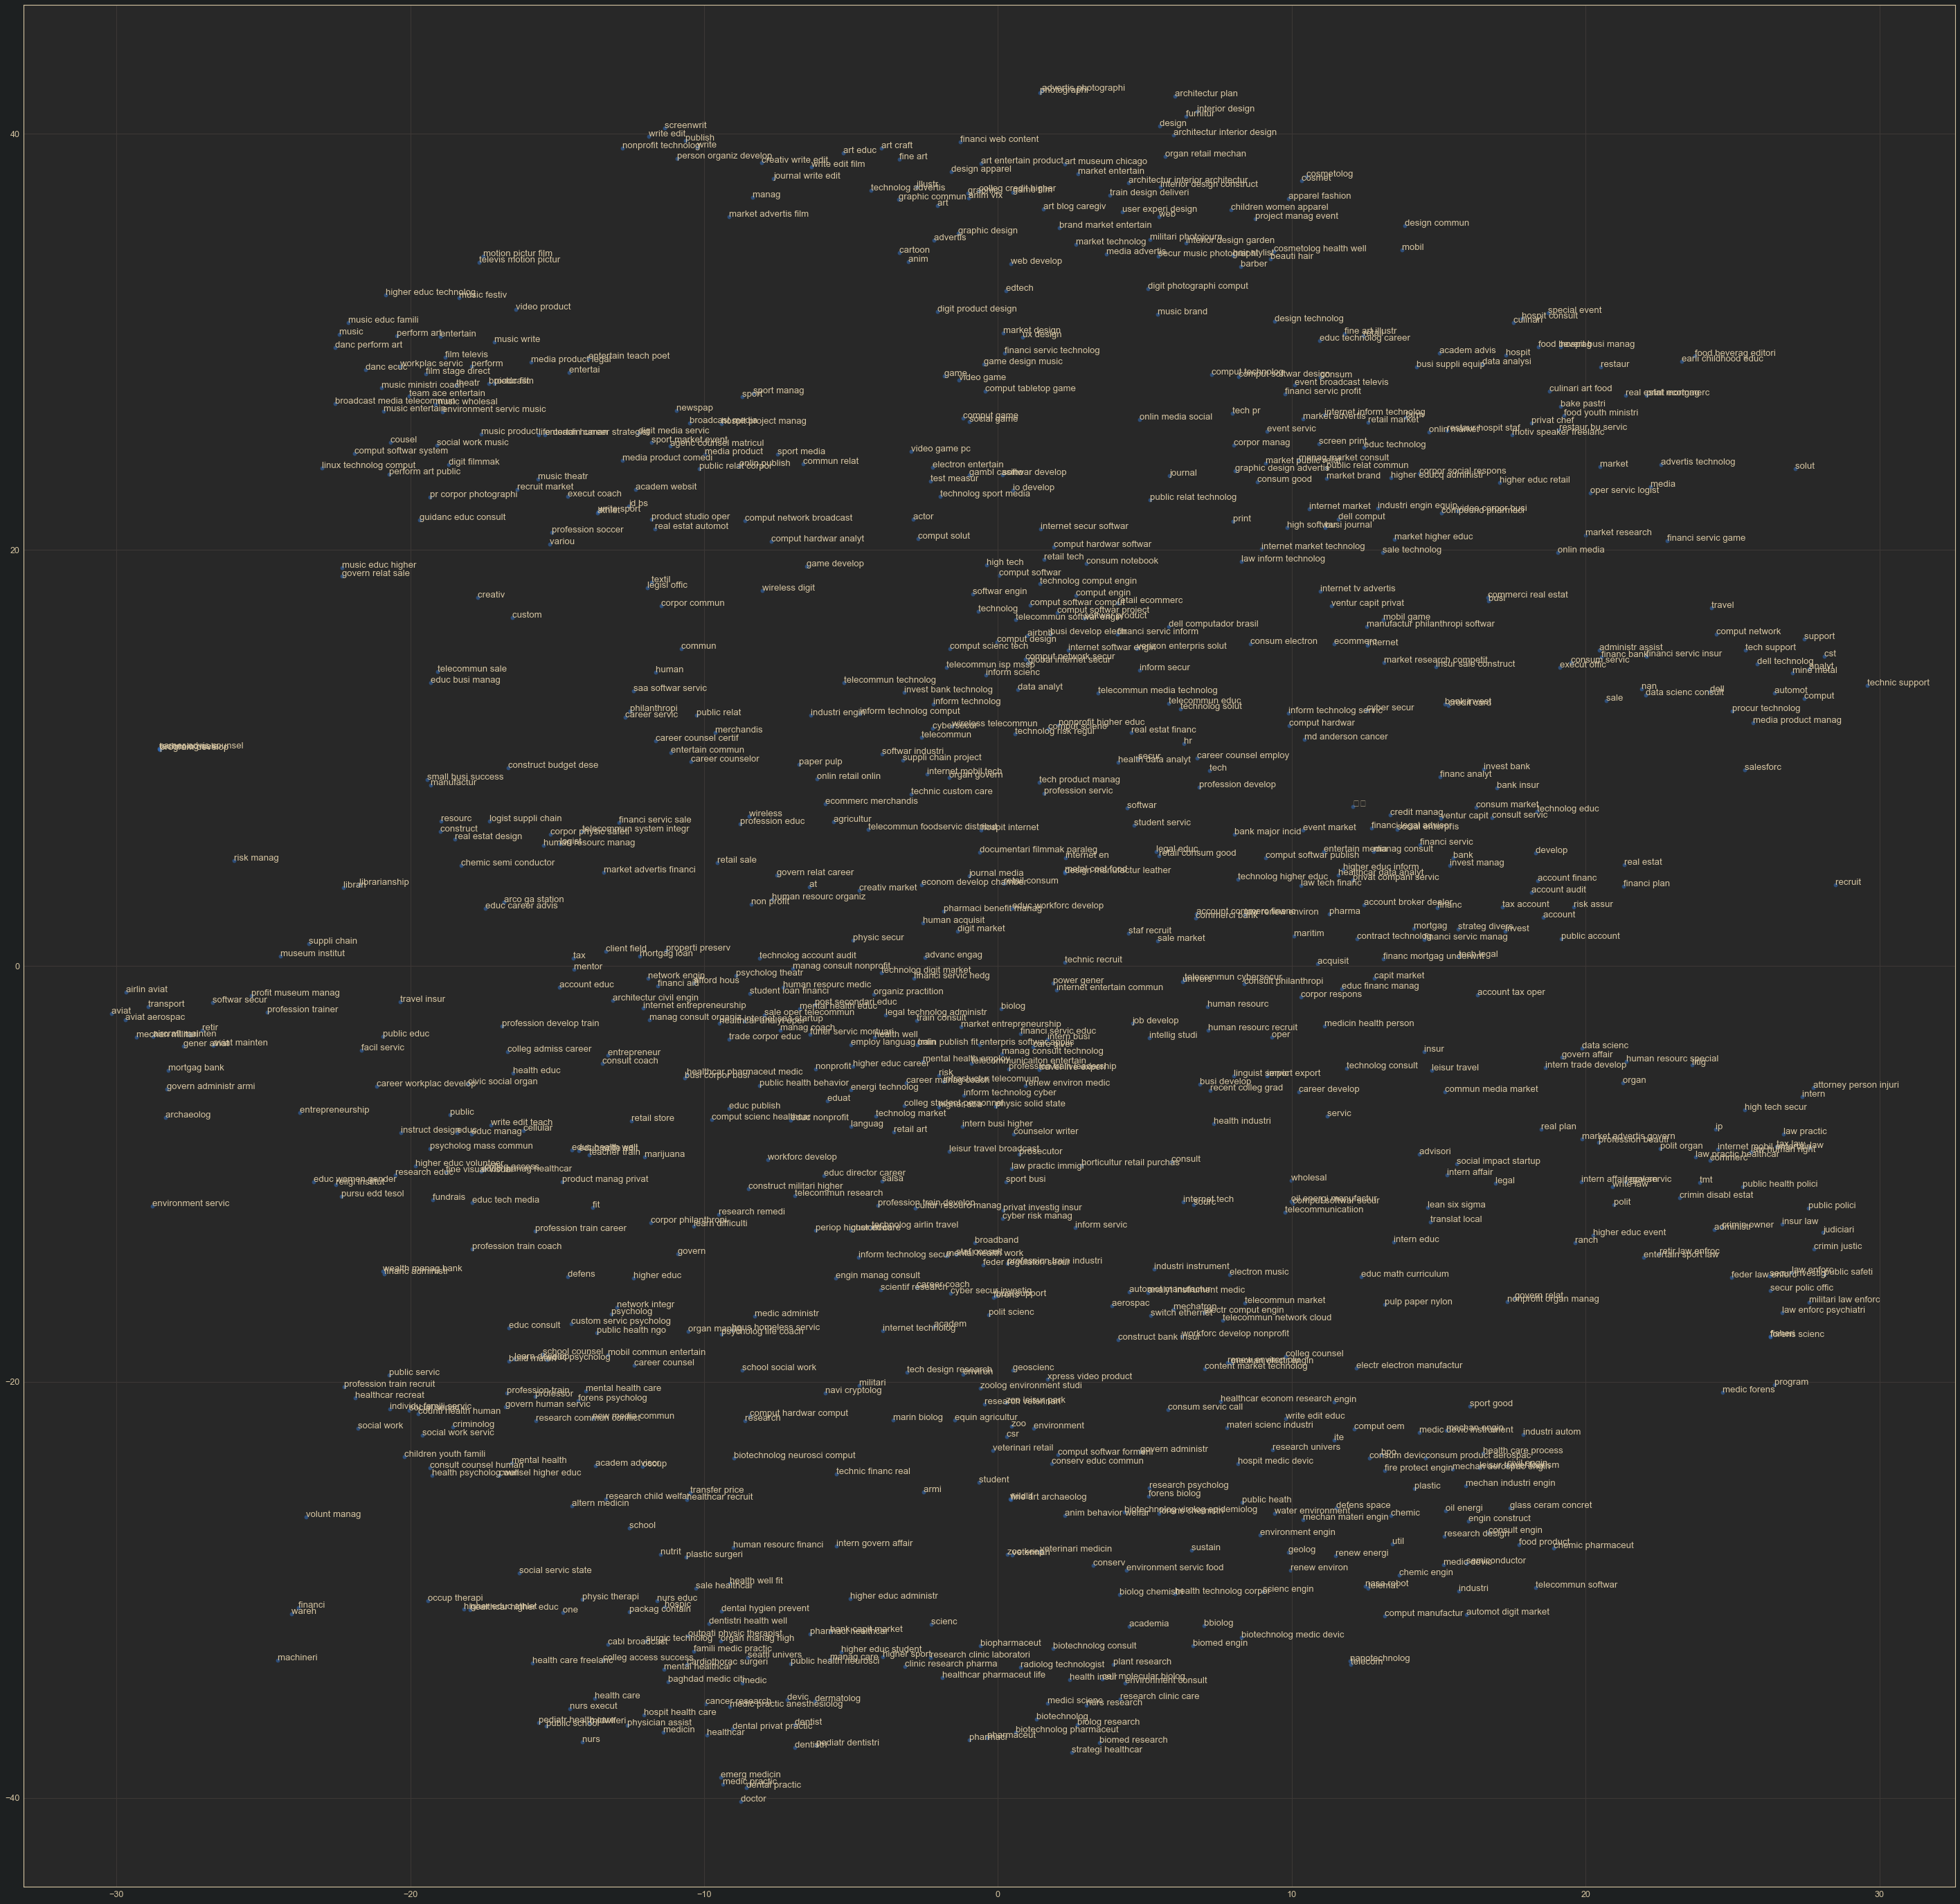

In [122]:
fig, ax = plt.subplots(figsize = (50, 50))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

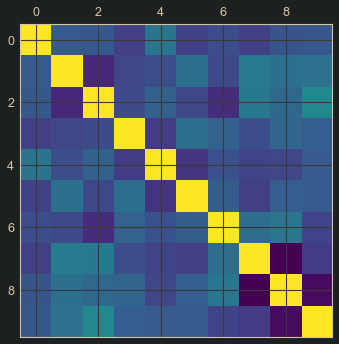

In [120]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [121]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.023690,0.010388,-0.108922,0.161881,-0.103124,-0.043657,-0.107727,-0.011498,0.010346
1,0.023690,1.000000,-0.212197,-0.074582,-0.035165,0.139179,-0.059394,0.198496,0.140483,0.145003
2,0.010388,-0.212197,1.000000,-0.051382,0.060501,-0.068498,-0.187626,0.187562,0.089739,0.273294
3,-0.108922,-0.074582,-0.051382,1.000000,-0.120197,0.126637,0.063466,-0.038282,0.079761,0.042388
4,0.161881,-0.035165,0.060501,-0.120197,1.000000,-0.152960,-0.023002,-0.092297,-0.076067,0.026941
5,-0.103124,0.139179,-0.068498,0.126637,-0.152960,1.000000,0.039927,-0.106189,0.042554,0.025948
6,-0.043657,-0.059394,-0.187626,0.063466,-0.023002,0.039927,1.000000,0.121230,0.172595,-0.088000
7,-0.107727,0.198496,0.187562,-0.038282,-0.092297,-0.106189,0.121230,1.000000,-0.364896,-0.121248
8,-0.011498,0.140483,0.089739,0.079761,-0.076067,0.042554,0.172595,-0.364896,1.000000,-0.327096
9,0.010346,0.145003,0.273294,0.042388,0.026941,0.025948,-0.088000,-0.121248,-0.327096,1.000000
